<a href="https://colab.research.google.com/github/phycem/Finance-Machine-Learning-Applications/blob/Main/Risk_Management_and_Default_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [44]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [11]:
doc = pd.read_csv('/content/data for participants.csv')

In [12]:
doc

,Credit_Limit,Sex,Education,Marital_Status,Age,Jan_Repay_Status,Previous_Payment_Prior_Jan,Jan_Statement,Feb_Repay_Status,Previous_Payment_Prior_Feb,...,Apr_Repay_Status,Previous_Payment_Prior_Apr,Apr_Statement,May_Repay_Status,Previous_Payment_Prior_May,May_Statement,Jun_Repay_Status,Previous_Payment_Prior_Jun,Jun_Statement,July_Payment_Status
0,9600.0,1.0,3.0,3.0,32.0,6.0,110.0,138.0,5.0,2847.0,...,7.0,331.0,1080.0,12.0,535.0,1671.0,3.0,4800.0,6799.0,1.0
1,14400.0,2.0,3.0,2.0,30.0,-2.0,0.0,132.0,-2.0,0.0,...,-2.0,0.0,0.0,-2.0,45.0,0.0,-2.0,136.0,45.0,0.0
2,8100.0,1.0,1.0,2.0,29.0,-1.0,133.0,7.0,-1.0,1700.0,...,-1.0,751.0,-4.0,-1.0,498.0,747.0,-1.0,381.0,496.0,0.0
3,2700.0,2.0,2.0,1.0,31.0,0.0,104.0,2891.0,0.0,140.0,...,0.0,40.0,2842.0,0.0,60.0,1187.0,0.0,19.0,1153.0,0.0
4,14500.0,2.0,2.0,1.0,37.0,-2.0,309.0,403.0,-2.0,94.0,...,-2.0,362.0,381.0,-2.0,0.0,362.0,-2.0,116.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30597,1700.0,2.0,2.0,1.0,29.0,0.0,80.0,1598.0,0.0,80.0,...,0.0,56.0,1598.0,0.0,52.0,1556.0,0.0,80.0,1509.0,0.0
30598,4700.0,1.0,1.0,2.0,33.0,2.0,80.0,2082.0,0.0,80.0,...,0.0,100.0,2194.0,0.0,100.0,2258.0,0.0,100.0,2321.0,1.0
30599,6000.0,2.0,1.0,2.0,53.0,0.0,191.0,5418.0,0.0,198.0,...,0.0,165.0,5740.0,0.0,201.0,5842.0,0.0,140.0,5994.0,1.0
30600,14500.0,2.0,3.0,2.0,46.0,-2.0,28.0,0.0,-2.0,0.0,...,-2.0,61.0,0.0,-2.0,0.0,61.0,-2.0,0.0,0.0,0.0


The columns in the provided dataset can be related to each other in the following ways:

1. Credit_Limit: The credit limit of an individual may impact their ability to make payments and manage their credit accounts. A higher credit limit allows for greater borrowing capacity.

2. Sex: The gender of an individual may not directly relate to the other columns in the dataset. However, it can be used as a demographic variable for analysis purposes, such as studying gender-based differences in credit usage or repayment behavior.

3. Education: The level of education attained by individuals may indirectly relate to their financial situation and ability to manage credit. Higher education levels could be associated with higher incomes or financial literacy, which may influence credit behavior.

4. Marital_Status: The marital status of individuals may have an impact on their financial responsibilities and stability. Married individuals may have joint financial obligations and potentially different credit behaviors compared to single individuals.

5. Age: Age can play a significant role in credit behavior. Younger individuals may have limited credit history and less financial experience, while older individuals may have more established credit profiles and different financial priorities.

6. Repayment Status Columns (Jan_Repay_Status, Feb_Repay_Status, etc.): These columns indicate the repayment status of individuals for different months. Analyzing these columns can provide insights into the consistency and timeliness of individuals' credit payments over time.

7. Previous_Payment_Prior Columns (Previous_Payment_Prior_Jan, Previous_Payment_Prior_Feb, etc.): These columns represent the previous payment amounts made by individuals before specific months. They can be used to analyze the payment patterns and behaviors of individuals, including the consistency and amounts of their previous payments.

8. Statement Columns (Jan_Statement, Feb_Statement, etc.): These columns represent the monthly statements of individuals, indicating their outstanding balances or charges. Analyzing these columns can provide insights into individuals' credit utilization and financial obligations.

9. July_Payment_Status: This column represents the payment status for the month of July. It can be used to analyze the latest payment behavior of individuals and determine if they have made timely or delayed payments.

By examining the relationships between these columns, we can gain a comprehensive understanding of individuals' credit profiles, payment behaviors, and financial patterns.

In [13]:
x = doc.drop(labels = ["July_Payment_Status"], axis = 1)
y = doc["July_Payment_Status"]

df_num = doc.select_dtypes(include='number')
df_cat = doc.select_dtypes(include=['object','category'])

In [14]:
doc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30602 entries, 0 to 30601
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Credit_Limit                30602 non-null  float64
 1   Sex                         30601 non-null  float64
 2   Education                   30599 non-null  float64
 3   Marital_Status              30598 non-null  float64
 4   Age                         30595 non-null  float64
 5   Jan_Repay_Status            30597 non-null  float64
 6   Previous_Payment_Prior_Jan  30599 non-null  float64
 7   Jan_Statement               30595 non-null  float64
 8   Feb_Repay_Status            30600 non-null  float64
 9   Previous_Payment_Prior_Feb  30597 non-null  float64
 10  Feb_Statement               30595 non-null  float64
 11  Mar_Repay_Status            30599 non-null  float64
 12  Previous_Payment_Prior_Mar  30600 non-null  float64
 13  Mar_Statement               305

In [15]:
missing_values = doc.isnull().sum()

In [16]:
missing_values

Credit_Limit                  0
Sex                           1
Education                     3
Marital_Status                4
Age                           7
Jan_Repay_Status              5
Previous_Payment_Prior_Jan    3
Jan_Statement                 7
Feb_Repay_Status              2
Previous_Payment_Prior_Feb    5
Feb_Statement                 7
Mar_Repay_Status              3
Previous_Payment_Prior_Mar    2
Mar_Statement                 4
Apr_Repay_Status              4
Previous_Payment_Prior_Apr    3
Apr_Statement                 3
May_Repay_Status              1
Previous_Payment_Prior_May    4
May_Statement                 3
Jun_Repay_Status              2
Previous_Payment_Prior_Jun    2
Jun_Statement                 5
July_Payment_Status           1
dtype: int64

In [17]:
categorical_columns = ['Sex', 'Education', 'Marital_Status']
repay_status_columns = ['Jan_Repay_Status', 'Feb_Repay_Status', 'Mar_Repay_Status', 'Apr_Repay_Status', 'May_Repay_Status', 'Jun_Repay_Status']

subset_columns = categorical_columns + repay_status_columns
doc = doc.dropna(subset=subset_columns)


In [18]:
missing_values = doc.isnull().sum()
missing_values

Credit_Limit                  0
Sex                           0
Education                     0
Marital_Status                0
Age                           6
Jan_Repay_Status              0
Previous_Payment_Prior_Jan    3
Jan_Statement                 7
Feb_Repay_Status              0
Previous_Payment_Prior_Feb    5
Feb_Statement                 7
Mar_Repay_Status              0
Previous_Payment_Prior_Mar    2
Mar_Statement                 4
Apr_Repay_Status              0
Previous_Payment_Prior_Apr    3
Apr_Statement                 3
May_Repay_Status              0
Previous_Payment_Prior_May    4
May_Statement                 3
Jun_Repay_Status              0
Previous_Payment_Prior_Jun    2
Jun_Statement                 5
July_Payment_Status           1
dtype: int64

Let's check which repayment column rows have the null values

In [19]:
null_rows = doc[doc['Previous_Payment_Prior_Jan'].isnull() | doc['Previous_Payment_Prior_Feb'].isnull() | doc['Previous_Payment_Prior_Mar'].isnull() | doc['Previous_Payment_Prior_Apr'].isnull() | doc['Previous_Payment_Prior_May'].isnull() | doc['Previous_Payment_Prior_Jun'].isnull()]

print(null_rows)


       Credit_Limit  Sex  Education  Marital_Status   Age  Jan_Repay_Status  \
1677         2500.0  1.0        4.0             3.0  56.0               7.0   
2078          600.0  1.0        5.0             1.0  90.0               9.0   
4093         3400.0  1.0        1.0             3.0  94.0               8.0   
4579         3100.0  1.0        3.0             3.0  59.0              -1.0   
6339         5500.0  2.0        1.0             2.0  46.0              12.0   
6446         8100.0  2.0        3.0             1.0  84.0               4.0   
7496          900.0  0.0        5.0             3.0  21.0              -1.0   
7739         7400.0  0.0        1.0             3.0  74.0              10.0   
12769        5700.0  3.0        3.0             1.0  18.0              10.0   
12813        2800.0  2.0        3.0             1.0  44.0               8.0   
13344        7400.0  6.0        5.0             1.0  41.0               4.0   
16192        4300.0  1.0        4.0             1.0 

#I noticed the sex column has some irrelevant integer values. Let's check:

In [ ]:
sex_values = doc['Sex'].unique()
print(sex_values)


[1. 2. 0. 3. 5. 8. 4. 7. 6.]


In [23]:
#count the integers except 1 and 2. Number of rows:
count = doc['Sex'][~doc['Sex'].isin([1, 2])].value_counts()
print(count)


0.0    110
3.0     45
4.0     12
5.0      3
6.0      3
7.0      2
8.0      1
Name: Sex, dtype: int64


#There are many columns which the wrong sex numbers. We should manipulate and replace them with 1 or 2.
#Let's print the rows of these sex values:

In [24]:
invalid_rows = doc[(doc['Sex'] != 1) & (doc['Sex'] != 2)]
print(invalid_rows)


       Credit_Limit  Sex  Education  Marital_Status   Age  Jan_Repay_Status  \
148          7500.0  0.0        3.0             1.0  70.0               4.0   
884          8600.0  3.0        3.0             3.0  80.0               7.0   
1176         3400.0  3.0        2.0             1.0  57.0              12.0   
1215         6700.0  0.0        5.0             2.0  84.0              10.0   
1265         7200.0  0.0        3.0             2.0  42.0               6.0   
...             ...  ...        ...             ...   ...               ...   
29826        7300.0  0.0        4.0             3.0  34.0               6.0   
30029        4700.0  0.0        2.0             1.0  97.0              10.0   
30041        3000.0  0.0        2.0             3.0  97.0              11.0   
30301        2200.0  0.0        3.0             3.0  95.0               3.0   
30352        5000.0  3.0        3.0             2.0  70.0               6.0   

       Previous_Payment_Prior_Jan  Jan_Statement  F

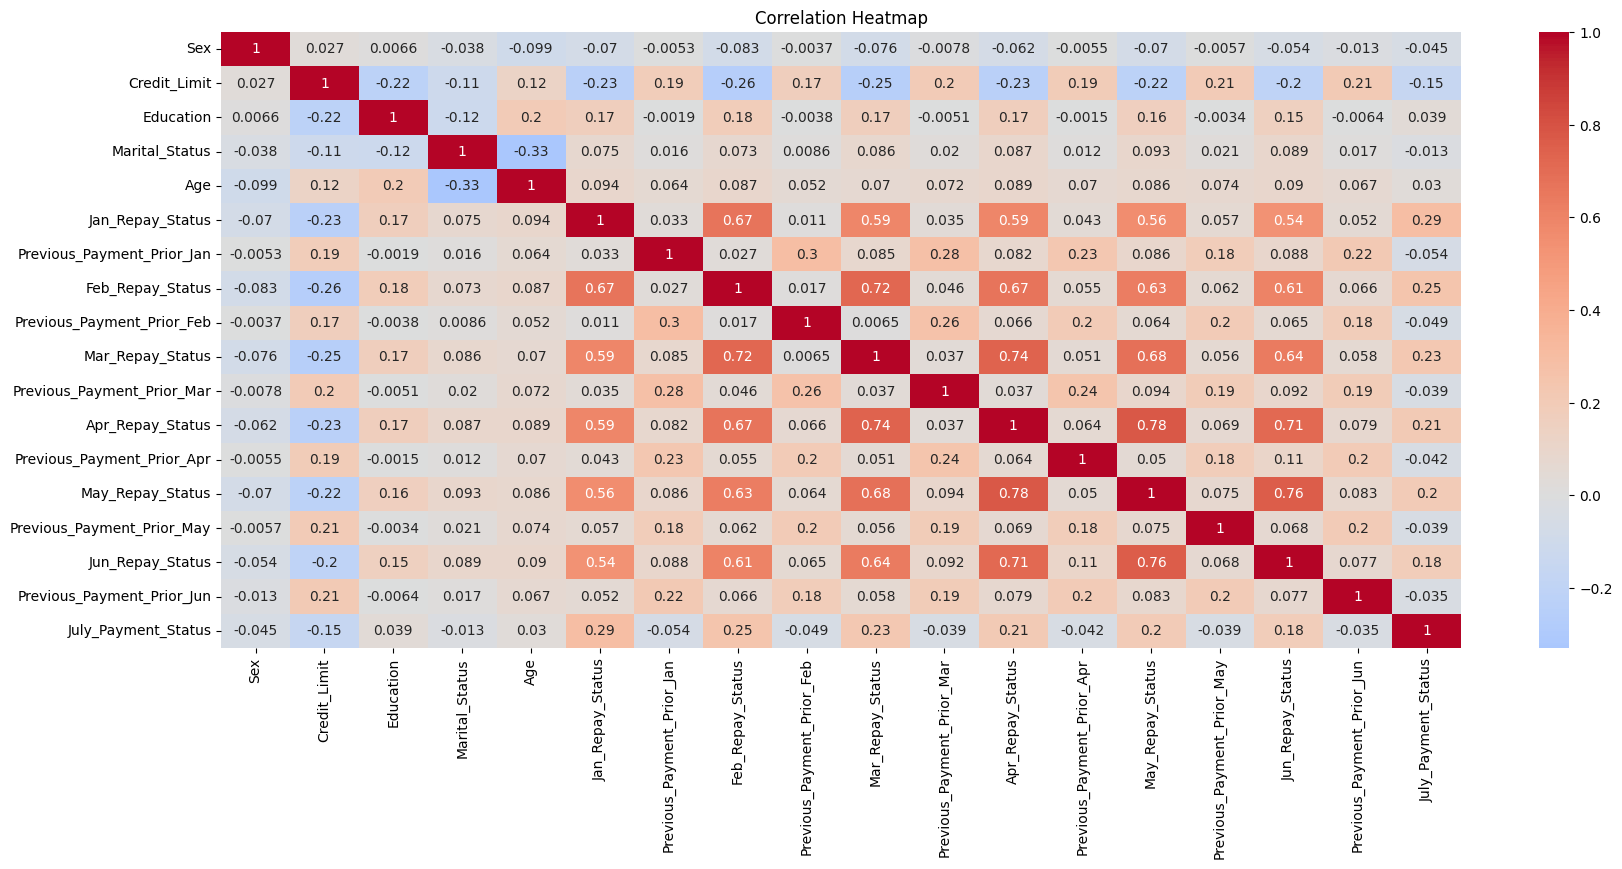

In [34]:
# Select the relevant columns for correlation analysis
columns_of_interest = ['Sex', 'Credit_Limit', 'Education', 'Marital_Status', 'Age', 'Jan_Repay_Status', 'Previous_Payment_Prior_Jan', 'Feb_Repay_Status', 'Previous_Payment_Prior_Feb', 'Mar_Repay_Status', 'Previous_Payment_Prior_Mar', 'Apr_Repay_Status', 'Previous_Payment_Prior_Apr', 'May_Repay_Status', 'Previous_Payment_Prior_May', 'Jun_Repay_Status', 'Previous_Payment_Prior_Jun', 'July_Payment_Status']


# Create a subset DataFrame with the selected columns
subset_doc = doc[columns_of_interest]

# Set the figure size
fig, ax = plt.subplots(figsize=(20, 8))


# Compute the correlation matrix
correlation_matrix = subset_doc.corr()

# Plot the correlation heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)

# Add a title to the plot
plt.title('Correlation Heatmap')


# Display the plot
plt.show()

Repay statuses are correlated greatly with previous month repay statuses. The correlation get lesser when the repay status gets further away month wise.


Depending on the repay status we can see its correlation with the july default. Higher repay status is more likely having july default (#1)

# Let's check the sexes of 1 and 2 regarding the default target :

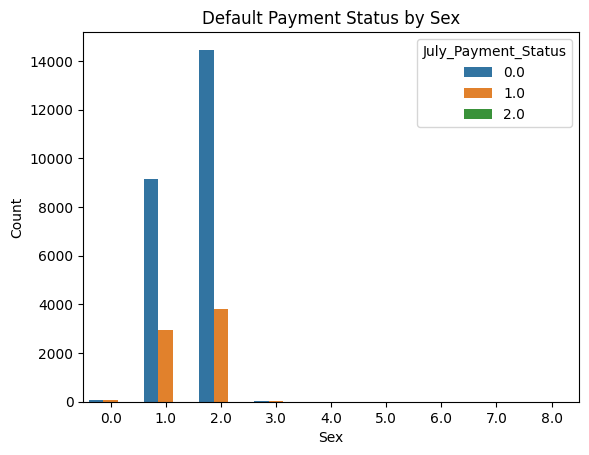

In [35]:
# Plotting the bar plot
sns.countplot(x='Sex', hue='July_Payment_Status', data=doc)

# Adding labels and title
plt.xlabel('Sex')
plt.ylabel('Count')
plt.title('Default Payment Status by Sex')

# Display the plot
plt.show()


We recognize there is a wrong numbering for default: "2" Ignoring "2", looking at 0 and 1 (paid and unpaid for July), **FEMALES** are more likely PAY ON TIME!!! THAN **MEN**



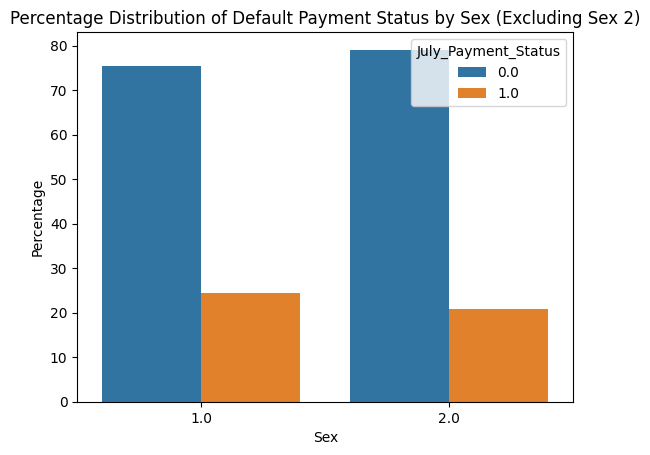

In [38]:


# Filter the DataFrame based on the conditions
filtered_df = doc[(doc['Sex'].isin([1, 2])) & (doc['July_Payment_Status'] != 2)]

# Compute the percentage distribution
percentage_dist = filtered_df.groupby('Sex')['July_Payment_Status'].value_counts(normalize=True) * 100

# Reset the index to access the values easily
percentage_dist = percentage_dist.reset_index(name='Percentage')

# Plotting the bar plot
sns.barplot(x='Sex', y='Percentage', hue='July_Payment_Status', data=percentage_dist)

# Adding labels and title
plt.xlabel('Sex')
plt.ylabel('Percentage')
plt.title('Percentage Distribution of Default Payment Status by Sex (Excluding Sex 2)')

# Display the plot
plt.show()


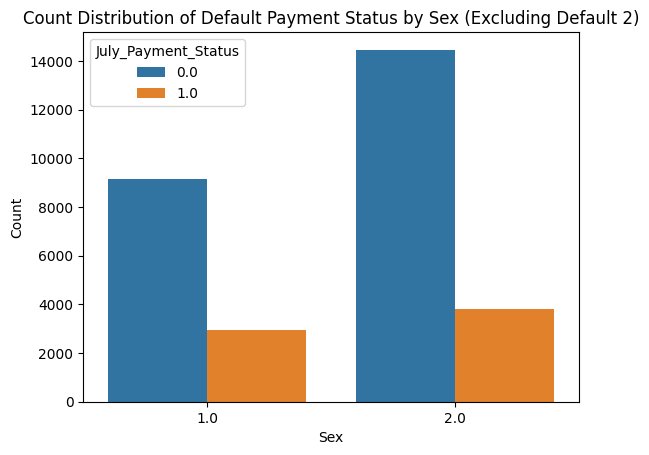

In [39]:

# Filter the DataFrame based on the conditions
filtered_df = doc[(doc['Sex'].isin([1, 2])) & (doc['July_Payment_Status'].isin([0, 1]))]

# Compute the count
count_dist = filtered_df.groupby('Sex')['July_Payment_Status'].value_counts()

# Reset the index to access the values easily
count_dist = count_dist.reset_index(name='Count')

# Plotting the bar plot
sns.barplot(x='Sex', y='Count', hue='July_Payment_Status', data=count_dist)

# Adding labels and title
plt.xlabel('Sex')
plt.ylabel('Count')
plt.title('Count Distribution of Default Payment Status by Sex (Excluding Default 2)')

# Display the plot
plt.show()


In [42]:
sex_counts = doc['Sex'].value_counts()

print(sex_counts)


2.0    18300
1.0    12101
0.0      110
3.0       45
4.0       12
5.0        3
6.0        3
7.0        2
8.0        1
Name: Sex, dtype: int64


Even tho females pay on time, they in ratios showing **same behavior** like **men** since number of **women** is more than men.

Then it will be fair to replace each half of the wrong sex numbers with female and male equally.

In [48]:
# Filter the DataFrame to exclude values other than 1 and 2 in the sex column
filtered_df = doc.loc[doc['Sex'].isin([1, 2])]

# Count the occurrences of each sex value
sex_counts = filtered_df['Sex'].value_counts()

# Calculate the percentage distribution
percent_dist = sex_counts / sex_counts.sum()

# Generate a random sample of the same length as the filtered DataFrame
random_sample = np.random.choice([1, 2], size=len(filtered_df), p=[0.5, 0.5])

# Replace the sex values in the filtered DataFrame with the random sample
filtered_df['Sex'] = random_sample

# Update the original DataFrame with the modified values
doc.loc[doc['Sex'].isin([1, 2])] = filtered_df

# Print the updated DataFrame
print(doc)
print(percent_dist)

       Credit_Limit  Sex  Education  Marital_Status   Age  Jan_Repay_Status  \
0            9600.0  2.0        3.0             3.0  32.0               6.0   
1           14400.0  1.0        3.0             2.0  30.0              -2.0   
2            8100.0  1.0        1.0             2.0  29.0              -1.0   
3            2700.0  1.0        2.0             1.0  31.0               0.0   
4           14500.0  2.0        2.0             1.0  37.0              -2.0   
...             ...  ...        ...             ...   ...               ...   
30597        1700.0  1.0        2.0             1.0  29.0               0.0   
30598        4700.0  1.0        1.0             2.0  33.0               2.0   
30599        6000.0  2.0        1.0             2.0  53.0               0.0   
30600       14500.0  2.0        3.0             2.0  46.0              -2.0   
30601        2500.0  1.0        2.0             1.0  51.0              -1.0   

       Previous_Payment_Prior_Jan  Jan_Statement  F

<ipython-input-48-a8479ee87db8>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['Sex'] = random_sample
<ipython-input-48-a8479ee87db8>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  doc.loc[doc['Sex'].isin([1, 2])] = filtered_df


In [47]:
sex_counts = filtered_df['Sex'].value_counts()

print(sex_counts)


1    15310
2    15091
Name: Sex, dtype: int64
